In this assignment, we will use data from Mashable (www.mashable.com). Mashable is an online magazine that focuses on producing viral content. You may wonder: what makes an article go viral? That’s what you will be trying to find out!

You use linear regression to predict the (log) number of shares from the other variables. Note that all variables can be calculated before an article is put online. Thus, Mashable could use your model to predict the (log) number of shares.

Objective

Build a linear regression model to predict the log number of shares an article received
Important note: beause the number of shares has a very right-skewed distribution, a log transformation has been made of the number of shares. This makes it easier to work with linear regression. Predict the shares_log variable.

Write a Jupyter Notebook report documenting your investigation.

Data set

The data comes from a study by Fernandes, Vinagre and Cortez (2015). The data set consists of over 30,000 articles with associated variables such as the title length, the article category and the weekday on which it was published. For simplicity, some variables have been deleted from the original data file, which can be found on Kaggle (a platform for machine learning).

- The data file we are working withPreview the document
- The data on UCI Machine Learning Repository (see here for the full file and information on variables); https://archive.ics.uci.edu/ml/datasets/online+news+popularity

Included in your Jupyter Notebook

Please add sufficient comments: not just explaining what you are doing, but why you are doing it.

- Explain briefly in your own words how linear regression works
- Your pre-processing steps
- The head() of the resulting data frame
- Split the dataset into a training and test set
- Select exactly 5 variables (collections of dummy variables, such as weekday_is_monday, weekday_is_tuesday, etc. count as 1 variable).
    - Explain why you selected those variables.
    - Make plots of the relation of your selected variables with the target
    - Comment on the linearity of the relationships
- Fit a linear regression model to predict the number of shares (using the training data. Give the equation of the model (please use Markdown formulas)
- Evaluate the model on the test data
- Predictive power of the model (R2, RMSE)
- Investigate the residuals

Notes

- Don't expect too big a performance of the model. I think somewhere in the order of R^2 = 0.05 - 0.08 can be expected at most.
- Please make sure only comments on the code are in coding formatting. Answers to questions in the assignment (e.g., "Explain how linear regression works in your own words" or "evaluate the performance of your model") are in text (Markdown) cells.
- Use Markdown formula notation for mathematical formulas (Links to an external site.)
- The Jupyter Notebook should run in its entirety. If you can't get a certain section to run, please comment out the code and explain what you would want it to do.


 Linear regression is a method in which linearity is assumed in a relationship between variables in order to create a model.

In [1]:
# Importing  libraries
import seaborn as sns
import sklearn as sk 
import pandas as pd
import matplotlib.pyplot as plt 

In [8]:
# Importing data set
DataFrame = pd.read_csv('data Mashable.csv')
DataFrame.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


In [15]:
training_df=DataFrame[0:17000]
testing_df=DataFrame[17001:24999]

training_df=training_df[['n_tokens_content','num_imgs','is_weekend','global_subjectivity','global_sentiment_polarity','shares_log']]
testing_df=testing_df[['n_tokens_content','num_imgs','is_weekend','global_subjectivity','global_sentiment_polarity','shares_log']]

The data set is split up in a training and testing part (roughly 70/30%). Next 5 variables are selected, these are chosen because I think they are the most correlated to the total amount of shares of an article. So this will lead to a better preforming model.

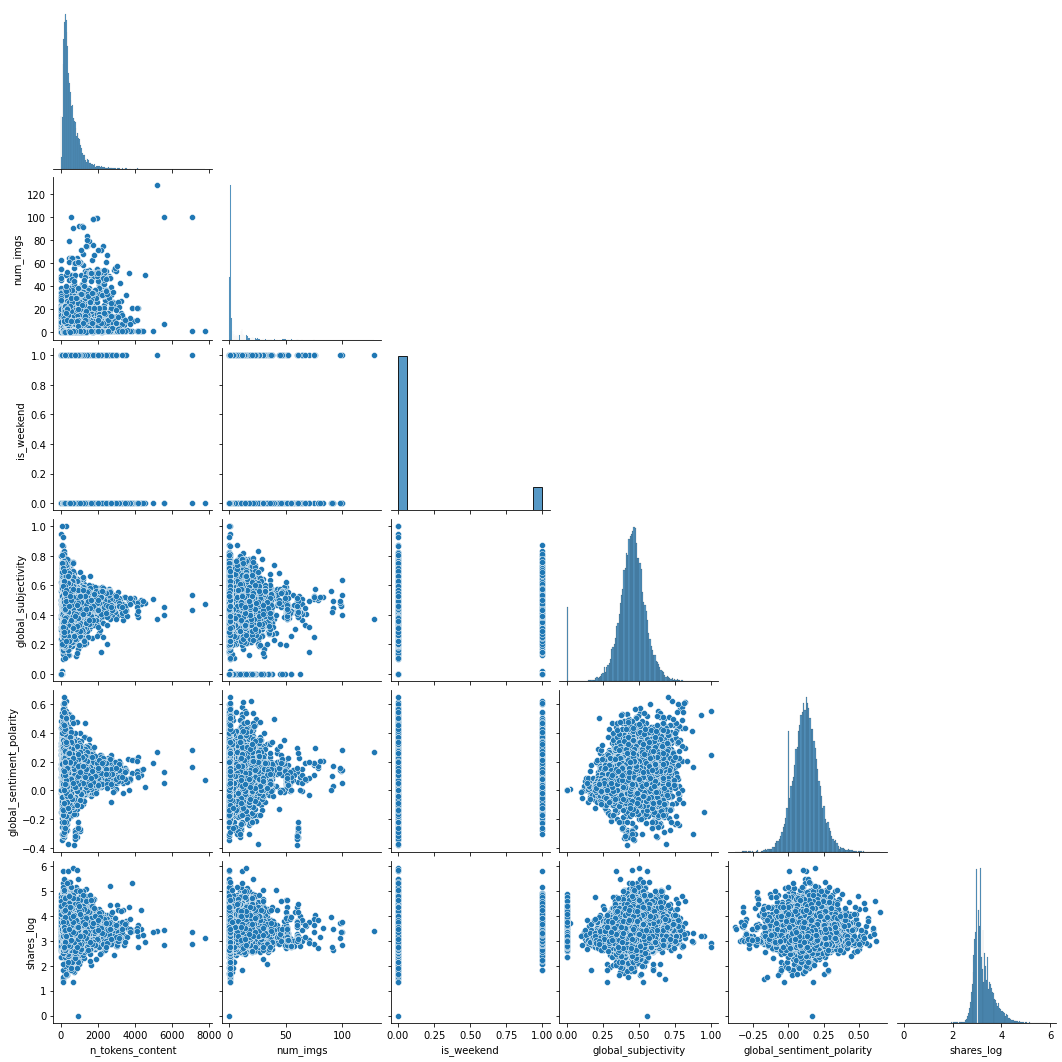

In [16]:
# Creating correlation polts
sns.pairplot(training_df, corner=True)

Looking at the bottom row it shows all the plots with respect to shares_log. Global subjectivity and sentiment polarity so no clear correlation with respect to shares. Weekend does, it beeing a weekend day results in a higher amount of shares. The number of pictures and shares do also show correlation, however not strictly linear.

In [27]:
# Creating the model
from sklearn.linear_model import LinearRegression
x_train=training_df[['n_tokens_content','num_imgs','is_weekend','global_subjectivity','global_sentiment_polarity']]
y_train=training_df[['shares_log']]
model = LinearRegression()
model.fit(x_train,y_train)
model.coef_

array([[-1.19168719e-05,  3.83976025e-03,  1.26719841e-01,
         2.77959537e-01,  9.74449651e-02]])

Share_log=-1.19168719e-05n_tokens_content+3.83976025e-03num_imgs+1.26719841e-01is_weekend+2.77959537e-01global_subjectivity+9.74449651e-02global_sentiment_polarity

In [28]:
# Evaluation of the model
x_test=testing_df[['n_tokens_content','num_imgs','is_weekend','global_subjectivity','global_sentiment_polarity']]
y_test=testing_df[['shares_log']]

y_predicted=model.predict(x_test)

In [31]:
# Predictive power of the model (R2, RMSE)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

RMSE = mean_squared_error(y_test, y_predicted, squared=False)
print(RMSE)

R2 = r2_score(y_test, y_predicted)
print(R2)

0.400305112514461
0.025155630164885756


On average the model is 0.4 log shares of the actual values and the model has a coefficient of determination of 0.025 which is indeed very low as stated in the assignment. 